In [10]:
# Import packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from toolz import interleave

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.float64)

In [2]:
df = pd.read_csv('exoplanets_2018.csv')

df = df.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'ExoplanetArchiveDisposition',
'koi_pdisposition':'DispositionUsingKeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit-LikeFalsePositiveFlag',
'koi_fpflag_ss':'koi_fpflag_ss',
'koi_fpflag_co':'CentroidOffsetFalsePositiveFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
'koi_period':'OrbitalPeriod[days',
'koi_period_err1':'OrbitalPeriodUpperUnc.[days',
'koi_period_err2':'OrbitalPeriodLowerUnc.[days',
'koi_time0bk':'TransitEpoch[BKJD',
'koi_time0bk_err1':'TransitEpochUpperUnc.[BKJD',
'koi_time0bk_err2':'TransitEpochLowerUnc.[BKJD',
'koi_impact':'ImpactParamete',
'koi_impact_err1':'ImpactParameterUpperUnc',
'koi_impact_err2':'ImpactParameterLowerUnc',
'koi_duration':'TransitDuration[hrs',
'koi_duration_err1':'TransitDurationUpperUnc.[hrs',
'koi_duration_err2':'TransitDurationLowerUnc.[hrs',
'koi_depth':'TransitDepth[ppm',
'koi_depth_err1':'TransitDepthUpperUnc.[ppm',
'koi_depth_err2':'TransitDepthLowerUnc.[ppm',
'koi_prad':'PlanetaryRadius[Earthradii',
'koi_prad_err1':'PlanetaryRadiusUpperUnc.[Earthradii',
'koi_prad_err2':'PlanetaryRadiusLowerUnc.[Earthradii',
'koi_teq':'EquilibriumTemperature[K',
'koi_teq_err1':'EquilibriumTemperatureUpperUnc.[K',
'koi_teq_err2':'EquilibriumTemperatureLowerUnc.[K',
'koi_insol':'InsolationFlux[Earthflux',
'koi_insol_err1':'InsolationFluxUpperUnc.[Earthflux',
'koi_insol_err2':'InsolationFluxLowerUnc.[Earthflux',
'koi_model_snr':'TransitSignal-to-Nois',
'koi_tce_plnt_num':'TCEPlanetNumbe',
'koi_tce_delivname':'TCEDeliver',
'koi_steff':'StellarEffectiveTemperature[K',
'koi_steff_err1':'StellarEffectiveTemperatureUpperUnc.[K',
'koi_steff_err2':'StellarEffectiveTemperatureLowerUnc.[K',
'koi_slogg':'StellarSurfaceGravity[log10(cm/s**2)',
'koi_slogg_err1':'StellarSurfaceGravityUpperUnc.[log10(cm/s**2)',
'koi_slogg_err2':'StellarSurfaceGravityLowerUnc.[log10(cm/s**2)',
'koi_srad':'StellarRadius[Solarradii',
'koi_srad_err1':'StellarRadiusUpperUnc.[Solarradii',
'koi_srad_err2':'StellarRadiusLowerUnc.[Solarradii',
'ra':'RA[decimaldegrees',
'dec':'Dec[decimaldegrees',
'koi_kepmag':'Kepler-band[mag]'
})


df['ExoplanetCandidate'] = df['DispositionUsingKeplerData'].apply(lambda x: 1 if x == 'CANDIDATE' else 0)
df['ExoplanetConfirmed'] = df['ExoplanetArchiveDisposition'].apply(lambda x: 2 if x == 'CONFIRMED' else 1 if x == 'CANDIDATE' else 0 )
df.drop(columns=['KeplerName','KOIName','EquilibriumTemperatureUpperUnc.[K',
                 'KepID','ExoplanetArchiveDisposition','DispositionUsingKeplerData',
                 'NotTransit-LikeFalsePositiveFlag','koi_fpflag_ss','CentroidOffsetFalsePositiveFlag',
                 'EphemerisMatchIndicatesContaminationFalsePositiveFlag','TCEDeliver',
                 'EquilibriumTemperatureLowerUnc.[K', 'ExoplanetConfirmed'], inplace=True)
df.dropna(inplace=True)
clean_dataset(df)
df.shape

(7803, 38)

In [3]:
df.columns

Index(['DispositionScore', 'OrbitalPeriod[days', 'OrbitalPeriodUpperUnc.[days',
       'OrbitalPeriodLowerUnc.[days', 'TransitEpoch[BKJD',
       'TransitEpochUpperUnc.[BKJD', 'TransitEpochLowerUnc.[BKJD',
       'ImpactParamete', 'ImpactParameterUpperUnc', 'ImpactParameterLowerUnc',
       'TransitDuration[hrs', 'TransitDurationUpperUnc.[hrs',
       'TransitDurationLowerUnc.[hrs', 'TransitDepth[ppm',
       'TransitDepthUpperUnc.[ppm', 'TransitDepthLowerUnc.[ppm',
       'PlanetaryRadius[Earthradii', 'PlanetaryRadiusUpperUnc.[Earthradii',
       'PlanetaryRadiusLowerUnc.[Earthradii', 'EquilibriumTemperature[K',
       'InsolationFlux[Earthflux', 'InsolationFluxUpperUnc.[Earthflux',
       'InsolationFluxLowerUnc.[Earthflux', 'TransitSignal-to-Nois',
       'TCEPlanetNumbe', 'StellarEffectiveTemperature[K',
       'StellarEffectiveTemperatureUpperUnc.[K',
       'StellarEffectiveTemperatureLowerUnc.[K',
       'StellarSurfaceGravity[log10(cm/s**2)',
       'StellarSurfaceGravityUpperU

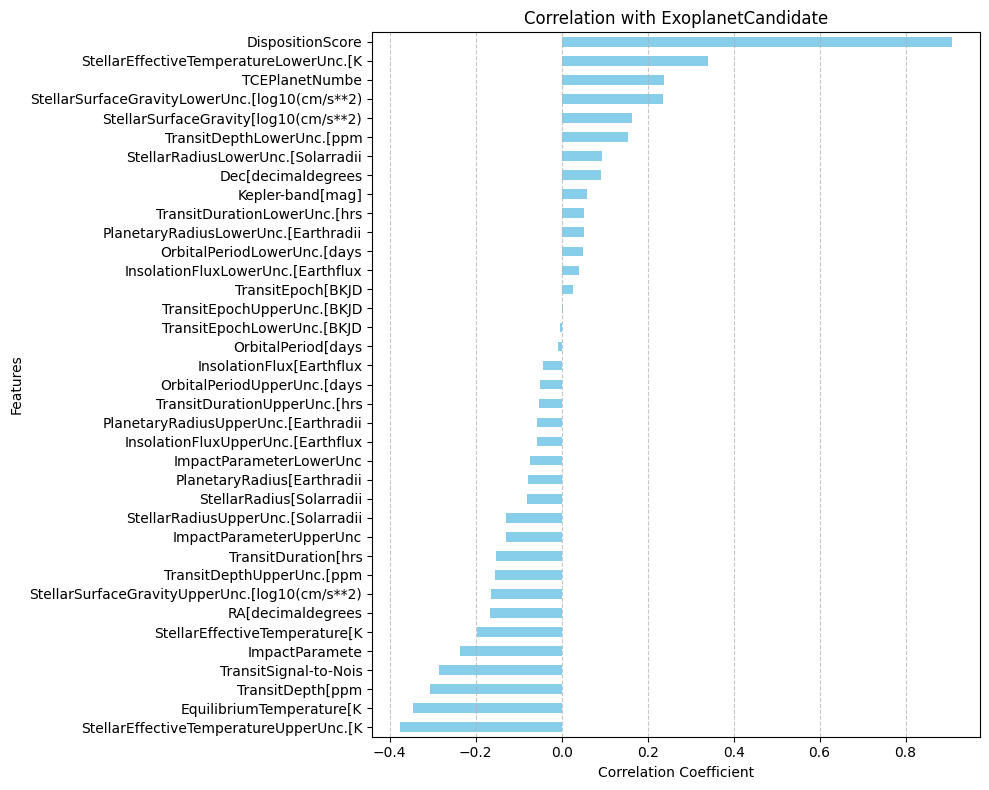

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded

# Compute the correlation matrix
correlation_matrix = df.corr()

# Extract correlations with 'ExoplanetCandidate'
correlations_with_target = correlation_matrix['ExoplanetCandidate'].drop('ExoplanetCandidate')

# Plot the correlations
plt.figure(figsize=(10, 8))
correlations_with_target.sort_values().plot(kind='barh', color='skyblue')
plt.title('Correlation with ExoplanetCandidate')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [4]:
df_candidate_0 = df[df['ExoplanetCandidate'] == 0]
df_candidate_1 = df[df['ExoplanetCandidate'] == 1]

sample_candidate_0 = df_candidate_0.sample(n=3700, random_state=42)
sample_candidate_1 = df_candidate_1.sample(n=3700, random_state=42)

# Concatenate the two sampled DataFrames
columns_from_df1 = sample_candidate_0.columns
combined_sample = pd.DataFrame(interleave([sample_candidate_0.values, sample_candidate_1.values]))
combined_sample.columns = columns_from_df1

#combined_sample = pd.concat([sample_candidate_0, sample_candidate_1]).sort_index().reset_index(drop=True)
# Display the combined DataFrame
combined_sample.head(20)

,DispositionScore,OrbitalPeriod[days,OrbitalPeriodUpperUnc.[days,OrbitalPeriodLowerUnc.[days,TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD,TransitEpochLowerUnc.[BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,...,StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag],ExoplanetCandidate
0,0.000,9.080194,5.980000e-07,-5.980000e-07,136.817021,0.000051,-0.000051,0.614,0.007,-0.011,...,4.396,0.062,-0.175,1.131,0.322,-0.138,297.17203,46.953949,15.163,0.0
1,0.135,40.651102,7.620000e-04,-7.620000e-04,164.552800,0.018100,-0.018100,0.682,0.271,-0.442,...,4.260,0.095,-0.116,1.369,0.249,-0.166,289.91971,40.168530,13.935,1.0
2,0.000,37.809539,1.380000e-03,-1.380000e-03,158.400200,0.032900,-0.032900,0.030,0.416,-0.030,...,4.570,0.038,-0.152,0.820,0.181,-0.078,289.77826,38.262741,15.752,0.0
3,0.966,3.295346,2.570000e-05,-2.570000e-05,132.487990,0.007200,-0.007200,0.729,0.009,-0.534,...,4.500,0.046,-0.184,0.954,0.252,-0.079,288.32791,47.381592,15.342,1.0
4,0.000,8.480398,5.760000e-05,-5.760000e-05,135.850180,0.006130,-0.006130,0.486,0.446,-0.279,...,4.364,0.153,-0.187,1.050,0.297,-0.183,298.73007,46.688671,14.673,0.0
5,0.519,367.947848,4.790000e-03,-4.790000e-03,416.209980,0.009720,-0.009720,0.902,0.062,-0.638,...,4.561,0.030,-0.170,0.855,0.207,-0.069,297.73398,46.961529,15.719,1.0
6,0.000,3.187752,1.820000e-05,-1.820000e-05,134.418000,0.004370,-0.004370,1.178,0.387,-0.114,...,4.489,0.069,-0.161,0.896,0.222,-0.095,285.37082,47.946499,14.640,0.0
7,1.000,114.736580,1.500000e-04,-1.500000e-04,165.150671,0.000977,-0.000977,0.595,0.037,-0.057,...,3.963,0.054,-0.045,1.699,0.147,-0.123,297.91687,46.965130,14.600,1.0
8,0.000,0.579517,3.630000e-06,-3.630000e-06,132.002560,0.004900,-0.004900,0.638,0.342,-0.431,...,4.387,0.087,-0.203,1.102,0.353,-0.151,294.41693,43.799587,13.559,0.0
9,1.000,7.362721,1.930000e-05,-1.930000e-05,136.861430,0.002140,-0.002140,0.253,0.198,-0.253,...,4.530,0.042,-0.179,0.894,0.231,-0.077,293.82663,38.856621,14.941,1.0


In [5]:
combined_sample.to_csv('planet.txt', sep=',', index=False, header=False)

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Separate features and result column
features = combined_sample.drop(columns=['ExoplanetCandidate'])
result = combined_sample['ExoplanetCandidate']

# Apply PCA on features only
pca = PCA(n_components=20)  # Adjust `n_components` as needed
pca_features = pca.fit_transform(features)

# Convert PCA results to a DataFrame
pca_df = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(pca.n_components)])

# Combine the PCA-transformed features with the result column
final_combined = pd.concat([pca_df, result.reset_index(drop=True)], axis=1)

# Display the final DataFrame
final_combined

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,ExoplanetCandidate
0,-8935.860891,298160.395995,-55.990257,-1563.361520,364.184437,1407.147473,-84.731094,-110.261683,235.112795,-40.524970,...,-3.327175,4.205792,-19.226070,8.266468,-1.498197,0.736401,4.908055,1.256245,3.050098,0.0
1,-7719.211079,-26715.502204,-818.645565,-1197.242986,254.325459,34.374248,-722.500798,13.449825,69.221184,-45.245577,...,9.068376,2.265264,-21.731569,-2.253346,-0.781609,5.066188,-1.770378,0.668954,-3.634311,1.0
2,-7751.882173,-26365.591070,-828.216157,-1204.063835,-406.816261,54.449709,-457.250050,21.807179,5.028337,-36.014254,...,-0.621770,-1.892162,6.382382,-3.480418,-2.545963,1.519808,-2.397852,0.543350,-5.797311,0.0
3,-7313.547013,-26708.297211,-662.858751,-997.777611,-82.449818,-144.553531,72.693245,-33.920984,31.056855,-35.417199,...,-7.819762,-2.999997,5.902275,-0.972782,-2.383246,-3.072933,-3.636604,0.246093,3.346218,1.0
4,-7603.383362,-26591.862786,-788.301313,-1127.357026,-351.754142,-51.421336,-44.392522,-24.119363,42.097999,-43.799633,...,-6.894511,-3.140132,13.022281,-2.185971,-1.802098,2.413952,6.278229,-0.026335,2.905278,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7395,-7658.959218,-26135.223433,-799.645017,-1189.314664,-58.263787,56.179438,-286.333554,-8.081972,49.387125,-52.900998,...,-0.850355,-0.478084,0.301174,-2.202450,-1.163432,0.066516,3.543899,0.526382,0.076375,1.0
7396,-4626.461796,30470.224156,-225.056850,262.544877,849.613996,322.831496,387.393888,-2.679922,-40.051652,-4.877364,...,-6.242838,-1.631708,17.187928,1.695540,-1.742882,-0.869565,3.851709,-0.177541,-0.091288,0.0
7397,-7019.908965,-26759.036588,-607.732070,-1061.884309,871.886123,-168.987624,-407.277488,-14.499577,53.829321,-55.275206,...,-1.739166,2.235377,-23.919308,-0.130123,-0.156454,-0.607628,3.600401,0.857773,-2.972811,1.0
7398,-3728.621980,-26801.584754,480.029685,778.197104,691.884071,-373.606759,407.851539,-74.332079,26.867814,0.803371,...,-6.981427,-4.845967,8.520680,1.447383,-1.196033,-0.872810,-0.476313,-1.029915,4.091563,0.0


In [20]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

pca2 = PCA(n_components=20)  # Adjust `n_components` as needed
pca_features = pca.fit_transform(scaled_data)
pca_df2 = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(pca.n_components)])

# Combine the PCA-transformed features with the result column
final_combined2 = pd.concat([pca_df2, result.reset_index(drop=True)], axis=1)

# Display the final DataFrame
final_combined2

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,ExoplanetCandidate
0,-0.332006,-1.103695,2.713078,-1.609298,-1.759507,-1.208250,1.413773,1.187088,2.233750,0.424125,...,0.796780,0.386945,0.388769,0.553638,-0.065769,1.197436,0.033353,-0.313569,0.288193,0.0
1,0.374029,0.997704,-0.691152,0.509041,0.129037,-0.534699,-0.452495,-0.559086,1.188330,0.022555,...,-0.501392,0.291491,-0.682592,-0.749535,-0.438934,0.009446,-0.281145,-1.093045,0.071379,1.0
2,0.796969,1.421821,0.207496,-0.510873,-0.273747,1.133074,-0.660913,1.080336,0.420467,1.243399,...,-1.478791,0.817592,-0.602130,-0.339659,-0.280404,-0.595151,0.306486,0.030731,-0.182421,0.0
3,0.730914,-0.456826,-0.518796,0.418522,0.481572,1.117805,-0.477999,0.312939,-1.211396,-1.033682,...,0.609840,1.082982,-0.680661,1.768705,0.502444,-0.330017,-0.322505,-0.361838,-0.012457,1.0
4,0.113450,-0.240281,0.459484,-0.537287,0.520924,0.465364,-0.074586,0.266549,0.040719,1.051815,...,1.258526,-0.119752,0.628966,-0.434787,0.372410,-0.378270,-0.124378,-0.315152,-0.333727,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7395,0.475826,-0.917421,-0.754275,0.387835,0.338453,-0.365196,-0.132102,-0.155215,-0.087297,-0.272423,...,0.387865,0.052425,0.446709,-0.642664,0.037843,0.899057,-0.137440,0.238450,-0.248375,1.0
7396,-1.075603,-0.939758,1.762030,-1.373583,0.410287,-0.477917,-0.071250,0.169691,0.277609,0.238928,...,0.210552,-0.067008,0.874780,0.141961,0.370863,-0.221615,-0.114313,0.009658,-0.119748,0.0
7397,0.002201,-0.340027,-1.226287,0.285109,0.591700,-1.069723,-1.268919,-0.552593,0.129980,-1.351425,...,0.072392,1.124851,0.562742,0.259184,-0.334284,1.184550,0.220686,-1.067798,0.050124,1.0
7398,-0.168967,0.991682,0.472202,-0.763174,0.752975,1.165761,-1.240350,0.655422,0.359254,0.449055,...,0.811299,-1.022410,-0.379032,0.242277,0.051172,-0.372388,-0.004308,-0.933459,0.808491,0.0


In [21]:
final_combined.to_csv('planet_pca.txt', sep=',', index=False, header=False)
final_combined2.to_csv('planet_pca_stand.txt', sep=',', index=False, header=False)

## Clean Data Again for Confirmed

In [8]:
df = pd.read_csv('exoplanets_2018.csv')

df = df.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'ExoplanetArchiveDisposition',
'koi_pdisposition':'DispositionUsingKeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit-LikeFalsePositiveFlag',
'koi_fpflag_ss':'koi_fpflag_ss',
'koi_fpflag_co':'CentroidOffsetFalsePositiveFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
'koi_period':'OrbitalPeriod[days',
'koi_period_err1':'OrbitalPeriodUpperUnc.[days',
'koi_period_err2':'OrbitalPeriodLowerUnc.[days',
'koi_time0bk':'TransitEpoch[BKJD',
'koi_time0bk_err1':'TransitEpochUpperUnc.[BKJD',
'koi_time0bk_err2':'TransitEpochLowerUnc.[BKJD',
'koi_impact':'ImpactParamete',
'koi_impact_err1':'ImpactParameterUpperUnc',
'koi_impact_err2':'ImpactParameterLowerUnc',
'koi_duration':'TransitDuration[hrs',
'koi_duration_err1':'TransitDurationUpperUnc.[hrs',
'koi_duration_err2':'TransitDurationLowerUnc.[hrs',
'koi_depth':'TransitDepth[ppm',
'koi_depth_err1':'TransitDepthUpperUnc.[ppm',
'koi_depth_err2':'TransitDepthLowerUnc.[ppm',
'koi_prad':'PlanetaryRadius[Earthradii',
'koi_prad_err1':'PlanetaryRadiusUpperUnc.[Earthradii',
'koi_prad_err2':'PlanetaryRadiusLowerUnc.[Earthradii',
'koi_teq':'EquilibriumTemperature[K',
'koi_teq_err1':'EquilibriumTemperatureUpperUnc.[K',
'koi_teq_err2':'EquilibriumTemperatureLowerUnc.[K',
'koi_insol':'InsolationFlux[Earthflux',
'koi_insol_err1':'InsolationFluxUpperUnc.[Earthflux',
'koi_insol_err2':'InsolationFluxLowerUnc.[Earthflux',
'koi_model_snr':'TransitSignal-to-Nois',
'koi_tce_plnt_num':'TCEPlanetNumbe',
'koi_tce_delivname':'TCEDeliver',
'koi_steff':'StellarEffectiveTemperature[K',
'koi_steff_err1':'StellarEffectiveTemperatureUpperUnc.[K',
'koi_steff_err2':'StellarEffectiveTemperatureLowerUnc.[K',
'koi_slogg':'StellarSurfaceGravity[log10(cm/s**2)',
'koi_slogg_err1':'StellarSurfaceGravityUpperUnc.[log10(cm/s**2)',
'koi_slogg_err2':'StellarSurfaceGravityLowerUnc.[log10(cm/s**2)',
'koi_srad':'StellarRadius[Solarradii',
'koi_srad_err1':'StellarRadiusUpperUnc.[Solarradii',
'koi_srad_err2':'StellarRadiusLowerUnc.[Solarradii',
'ra':'RA[decimaldegrees',
'dec':'Dec[decimaldegrees',
'koi_kepmag':'Kepler-band[mag]'
})


df['ExoplanetCandidate'] = df['DispositionUsingKeplerData'].apply(lambda x: 1 if x == 'CANDIDATE' else 0)
df['ExoplanetConfirmed'] = df['ExoplanetArchiveDisposition'].apply(lambda x: 2 if x == 'CONFIRMED' else 1 if x == 'CANDIDATE' else 0 )
df.drop(columns=['KeplerName','KOIName','EquilibriumTemperatureUpperUnc.[K',
                 'KepID','ExoplanetArchiveDisposition','DispositionUsingKeplerData',
                 'NotTransit-LikeFalsePositiveFlag','koi_fpflag_ss','CentroidOffsetFalsePositiveFlag',
                 'EphemerisMatchIndicatesContaminationFalsePositiveFlag','TCEDeliver',
                 'EquilibriumTemperatureLowerUnc.[K'], inplace=True)
df.dropna(inplace=True)
clean_dataset(df)
df.head(10)

,DispositionScore,OrbitalPeriod[days,OrbitalPeriodUpperUnc.[days,OrbitalPeriodLowerUnc.[days,TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD,TransitEpochLowerUnc.[BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,...,StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag],ExoplanetCandidate,ExoplanetConfirmed
0,1.000,9.488036,2.780000e-05,-2.780000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,...,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,2
1,0.969,54.418383,2.480000e-04,-2.480000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,...,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,2
2,0.000,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,...,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,1,1
3,0.000,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,...,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0,0
4,1.000,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,...,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1,2
5,1.000,11.094321,2.040000e-05,-2.040000e-05,171.201160,0.001410,-0.001410,0.538,0.030,-0.428,...,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714,1,2
6,1.000,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,0.762,0.139,-0.532,...,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714,1,2
7,0.992,2.566589,1.780000e-05,-1.780000e-05,179.554370,0.004610,-0.004610,0.755,0.212,-0.523,...,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714,1,2
8,0.000,7.361790,2.130000e-05,-2.130000e-05,132.250530,0.002530,-0.002530,1.169,7.133,-0.044,...,0.182,-0.098,1.958,0.322,-0.483,298.86435,42.151569,12.660,0,0
9,1.000,16.068647,1.090000e-05,-1.090000e-05,173.621937,0.000517,-0.000517,0.052,0.262,-0.052,...,0.083,-0.028,0.848,0.033,-0.072,286.99948,48.375790,15.841,1,2


## get data with strong corr (|corr| > 0.2)

In [11]:
df = pd.read_csv('exoplanets_2018.csv')

df = df.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'ExoplanetArchiveDisposition',
'koi_pdisposition':'DispositionUsingKeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit-LikeFalsePositiveFlag',
'koi_fpflag_ss':'koi_fpflag_ss',
'koi_fpflag_co':'CentroidOffsetFalsePositiveFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
'koi_period':'OrbitalPeriod[days',
'koi_period_err1':'OrbitalPeriodUpperUnc.[days',
'koi_period_err2':'OrbitalPeriodLowerUnc.[days',
'koi_time0bk':'TransitEpoch[BKJD',
'koi_time0bk_err1':'TransitEpochUpperUnc.[BKJD',
'koi_time0bk_err2':'TransitEpochLowerUnc.[BKJD',
'koi_impact':'ImpactParamete',
'koi_impact_err1':'ImpactParameterUpperUnc',
'koi_impact_err2':'ImpactParameterLowerUnc',
'koi_duration':'TransitDuration[hrs',
'koi_duration_err1':'TransitDurationUpperUnc.[hrs',
'koi_duration_err2':'TransitDurationLowerUnc.[hrs',
'koi_depth':'TransitDepth[ppm',
'koi_depth_err1':'TransitDepthUpperUnc.[ppm',
'koi_depth_err2':'TransitDepthLowerUnc.[ppm',
'koi_prad':'PlanetaryRadius[Earthradii',
'koi_prad_err1':'PlanetaryRadiusUpperUnc.[Earthradii',
'koi_prad_err2':'PlanetaryRadiusLowerUnc.[Earthradii',
'koi_teq':'EquilibriumTemperature[K',
'koi_teq_err1':'EquilibriumTemperatureUpperUnc.[K',
'koi_teq_err2':'EquilibriumTemperatureLowerUnc.[K',
'koi_insol':'InsolationFlux[Earthflux',
'koi_insol_err1':'InsolationFluxUpperUnc.[Earthflux',
'koi_insol_err2':'InsolationFluxLowerUnc.[Earthflux',
'koi_model_snr':'TransitSignal-to-Nois',
'koi_tce_plnt_num':'TCEPlanetNumbe',
'koi_tce_delivname':'TCEDeliver',
'koi_steff':'StellarEffectiveTemperature[K',
'koi_steff_err1':'StellarEffectiveTemperatureUpperUnc.[K',
'koi_steff_err2':'StellarEffectiveTemperatureLowerUnc.[K',
'koi_slogg':'StellarSurfaceGravity[log10(cm/s**2)',
'koi_slogg_err1':'StellarSurfaceGravityUpperUnc.[log10(cm/s**2)',
'koi_slogg_err2':'StellarSurfaceGravityLowerUnc.[log10(cm/s**2)',
'koi_srad':'StellarRadius[Solarradii',
'koi_srad_err1':'StellarRadiusUpperUnc.[Solarradii',
'koi_srad_err2':'StellarRadiusLowerUnc.[Solarradii',
'ra':'RA[decimaldegrees',
'dec':'Dec[decimaldegrees',
'koi_kepmag':'Kepler-band[mag]'
})


df['ExoplanetCandidate'] = df['DispositionUsingKeplerData'].apply(lambda x: 1 if x == 'CANDIDATE' else 0)
df['ExoplanetConfirmed'] = df['ExoplanetArchiveDisposition'].apply(lambda x: 2 if x == 'CONFIRMED' else 1 if x == 'CANDIDATE' else 0 )
df.drop(columns=['KeplerName','KOIName','EquilibriumTemperatureUpperUnc.[K',
                 'KepID','ExoplanetArchiveDisposition','DispositionUsingKeplerData',
                 'NotTransit-LikeFalsePositiveFlag','koi_fpflag_ss','CentroidOffsetFalsePositiveFlag',
                 'EphemerisMatchIndicatesContaminationFalsePositiveFlag','TCEDeliver',
                 'EquilibriumTemperatureLowerUnc.[K', 'ExoplanetConfirmed'], inplace=True)
df.dropna(inplace=True)
clean_dataset(df)
df.shape

(7803, 38)

In [16]:
def balance_df(df):
    df_candidate_0 = df[df['ExoplanetCandidate'] == 0]
    df_candidate_1 = df[df['ExoplanetCandidate'] == 1]
    
    sample_candidate_0 = df_candidate_0.sample(n=3700, random_state=42)
    sample_candidate_1 = df_candidate_1.sample(n=3700, random_state=42)
    
    # Concatenate the two sampled DataFrames
    columns_from_df1 = sample_candidate_0.columns
    combined_sample = pd.DataFrame(interleave([sample_candidate_0.values, sample_candidate_1.values]))
    combined_sample.columns = columns_from_df1
    return combined_sample

In [17]:
columns_to_extract = [
    'DispositionScore',
    'StellarEffectiveTemperatureLowerUnc.[K',
    'TCEPlanetNumbe', 
    'StellarSurfaceGravityLowerUnc.[log10(cm/s**2)',
    'StellarSurfaceGravityUpperUnc.[log10(cm/s**2)',
    'EquilibriumTemperature[K',
    'TransitDepth[ppm',
    'TransitSignal-to-Nois',
    'ImpactParamete',
    'ExoplanetCandidate'
]

# Create a new DataFrame with only the selected columns
strong_corr_df = df[columns_to_extract]
balanced_strong_corr_df = balance_df(strong_corr_df)
balanced_strong_corr_df.to_csv('planet_corr_9.txt', sep=',', index=False, header=False)

In [19]:
columns_to_extract = [
    'DispositionScore',
    'StellarEffectiveTemperatureLowerUnc.[K',
    'StellarSurfaceGravityUpperUnc.[log10(cm/s**2)',
    'EquilibriumTemperature[K',
    'TransitDepth[ppm',
    'ExoplanetCandidate'
]

# Create a new DataFrame with only the selected columns
strong_corr5_df = df[columns_to_extract]

balanced_strong_corr5_df = balance_df(strong_corr5_df)
balanced_strong_corr5_df.to_csv('planet_corr_5.txt', sep=',', index=False, header=False)